# Setup

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [2]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [3]:
def gamma_hat(X, N):
    gamma_hat = np.zeros(N)
    for tau in range(N):
        sum_gamma = 0
        for i in range(N - tau):
            sum_gamma += X[i] * X[i + tau]
        gamma_hat[tau] = sum_gamma / (N)
    return gamma_hat

def periodogram(X, N, f_s):
    freqs = np.linspace(0, 0.5, N)
    discret_ft = np.zeros(N, dtype=complex)
    gamma_hat_values = gamma_hat(X, N)

    for i, f in enumerate(freqs):
        sum_ft = 0
        for tau in range(N):
            sum_ft += gamma_hat_values[tau] * np.exp(-2j * np.pi * f * tau/f_s)
        discret_ft[i] = sum_ft
    
    return discret_ft

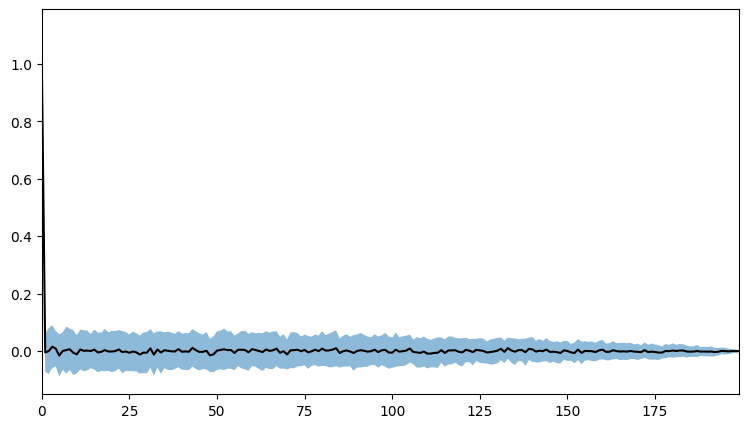

C:\Users\Franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axes\_axes.py:5477: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
C:\Users\Franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axes\_axes.py:5478: ComplexWarning: Casting comple

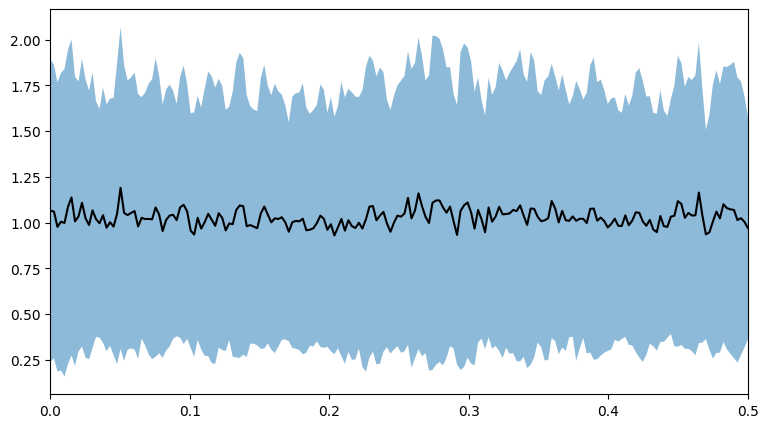

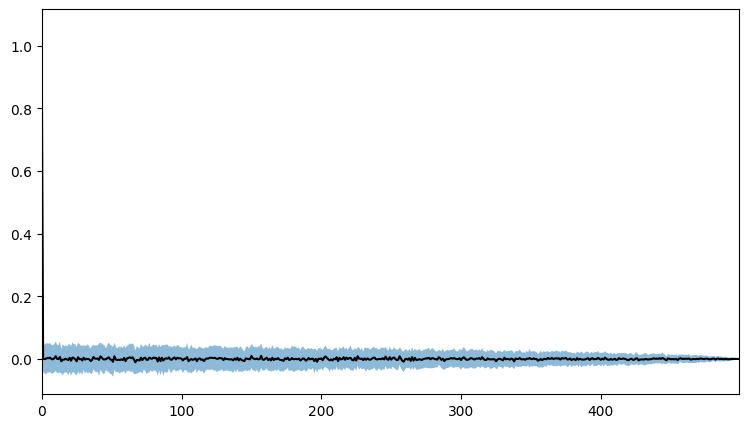

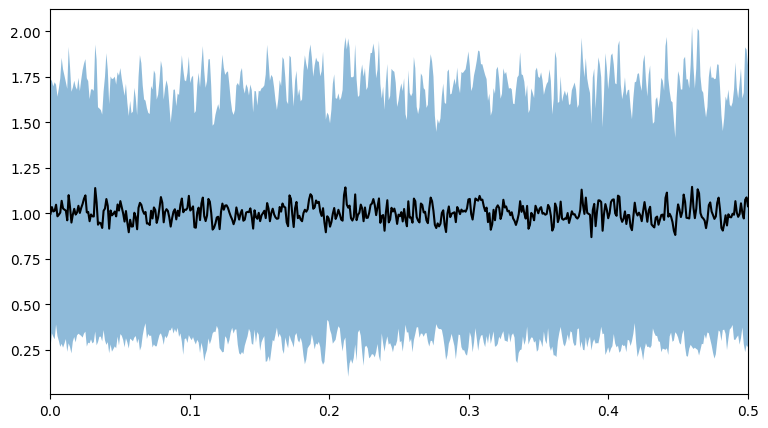

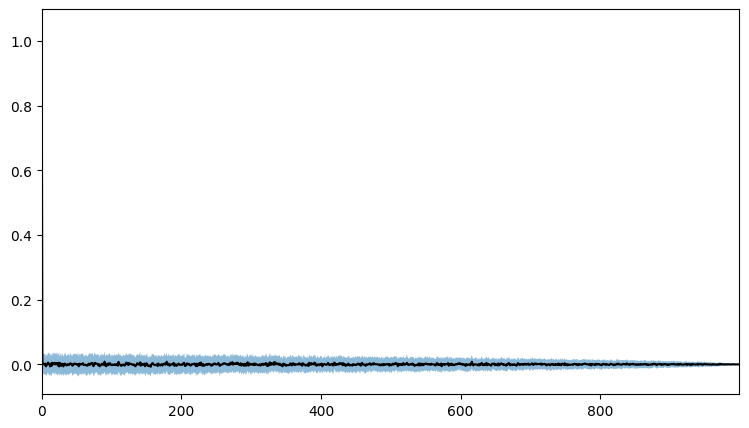

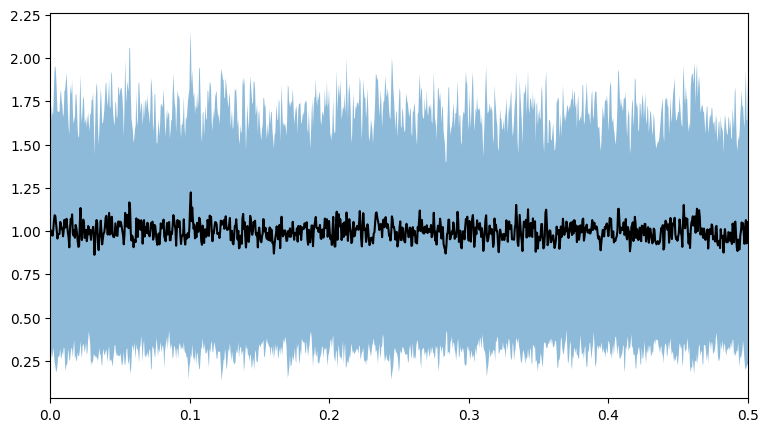

In [19]:
# This is an example of plot (random data). You can change it if you want.

for N in [200, 500, 1000]:
    all_gamma_hats = np.zeros((100, N))
    all_periodograms = np.zeros((100, N), dtype=complex)
    for i in range(100):

        X = np.random.randn(N) # Generate random data
        gamma_vals = gamma_hat(X, N) # Compute the sample autocorrelation function
        periodogram_vals = periodogram(X, N, f_s=1)

        # Store the result
        all_gamma_hats[i, :] = gamma_vals
        all_periodograms[i, :] = periodogram_vals

    # Compute mean and standard deviation across simulations
    mean_gamma_hat = np.mean(all_gamma_hats, axis=0)
    std_gamma_hat = np.std(all_gamma_hats, axis=0)

    mean_periodogram = np.mean(all_periodograms, axis=0)
    std_periodogram = np.std(all_periodograms, axis=0)

    tau = np.arange(N)
    fig, ax = fig_ax(figsize=(9, 5))
    ax.plot(tau, mean_gamma_hat, 'k-')
    ax.fill_between(tau, mean_gamma_hat-std_gamma_hat, mean_gamma_hat+std_gamma_hat, alpha=0.5)
    plt.show()

    freqs = np.linspace(0, 0.5, N)
    fig, ax = fig_ax(figsize=(9, 5))
    ax.plot(freqs, mean_periodogram, 'k-')
    ax.fill_between(freqs, mean_periodogram-std_periodogram, mean_periodogram+std_periodogram, alpha=0.5)
    plt.show()


## Question 9

In [13]:
def bartlett_periodogram(X, N, K, f_s):
    L = N // K  # Length of each section
    avg_periodogram = np.zeros(N, dtype=complex)

    for j in range(K):
        section = X[j * L:(j + 1) * L]  # Get the j-th section
        periodogram_vals = periodogram(section, L, f_s)
        avg_periodogram[j * L:(j + 1) * L] += periodogram_vals

    return avg_periodogram / K

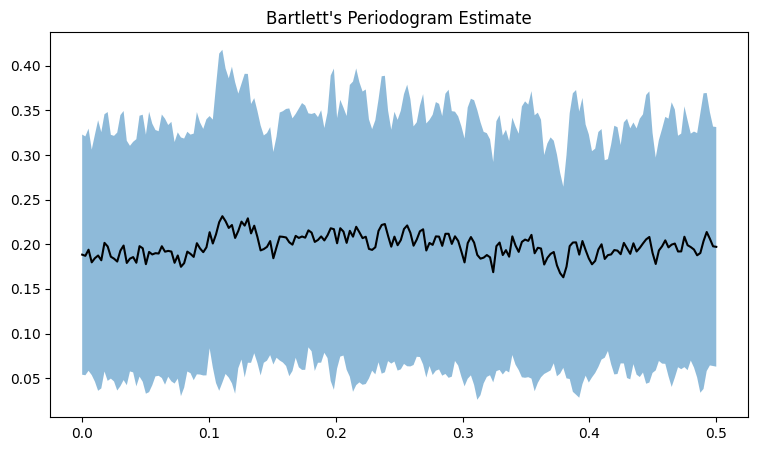

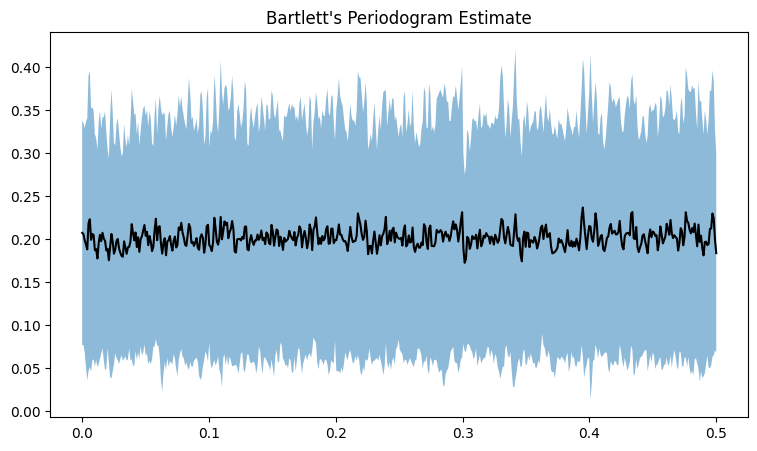

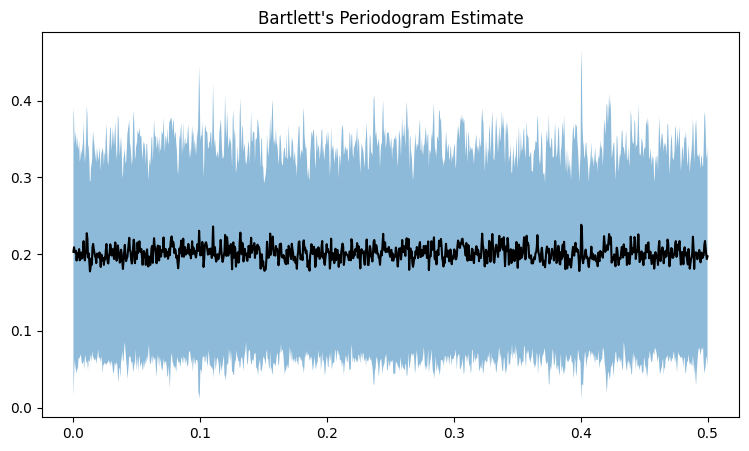

In [14]:
# Parameters to test
N_values = [200, 500, 1000]
K = 5  # Number of sections for Bartlett's method

for N in N_values:
    all_gamma_hats = np.zeros((100, N))
    all_periodograms = np.zeros((100, N), dtype=complex)

    for i in range(100):
        X = np.random.randn(N)  # Generate random data
        gamma_vals = gamma_hat(X, N)  # Compute the sample autocorrelation function
        periodogram_vals = bartlett_periodogram(X, N, K, f_s=1)  # Use Bartlett's estimate

        # Store the result
        all_gamma_hats[i, :] = gamma_vals
        all_periodograms[i, :] = periodogram_vals

    # Compute mean and standard deviation across simulations
    mean_gamma_hat = np.mean(all_gamma_hats, axis=0)
    std_gamma_hat = np.std(all_gamma_hats, axis=0)

    mean_periodogram = np.mean(all_periodograms, axis=0)
    std_periodogram = np.std(all_periodograms, axis=0)

    freqs = np.linspace(0, 0.5, N)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(freqs, mean_periodogram, 'k-')
    ax.fill_between(freqs, mean_periodogram - std_periodogram, mean_periodogram + std_periodogram, alpha=0.5)
    ax.set_title("Bartlett's Periodogram Estimate")
    plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10

## Question 11